In [1]:
from FastModule import *

In [2]:
raw_sound_in=Spectrum.read_wav_file("Test_Lab/Sound_Files/Run01/45sec.wav")

In [3]:
raw_sound_out=[None]*6

In [4]:
raw_sound_out[0]=Spectrum.read_wav_file("Test_Lab/Sound_Files/Run01/t0pp.wav")

In [5]:
raw_sound_out[1]=Spectrum.read_wav_file("Test_Lab/Sound_Files/Run01/t1pp.wav")
raw_sound_out[2]=Spectrum.read_wav_file("Test_Lab/Sound_Files/Run01/t2pp.wav")
raw_sound_out[3]=Spectrum.read_wav_file("Test_Lab/Sound_Files/Run01/t3pp.wav")
raw_sound_out[4]=Spectrum.read_wav_file("Test_Lab/Sound_Files/Run01/t4pp.wav")
raw_sound_out[5]=Spectrum.read_wav_file("Test_Lab/Sound_Files/Run01/t5pp.wav")

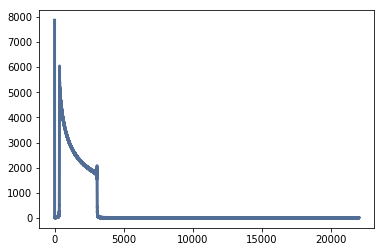

In [6]:
Spectrum.plot_spectrum(raw_sound_in)

output : # 0


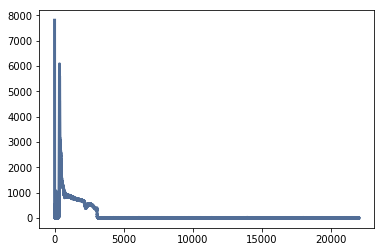

______________________________________
output : # 1


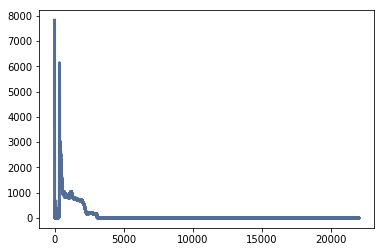

______________________________________
output : # 2


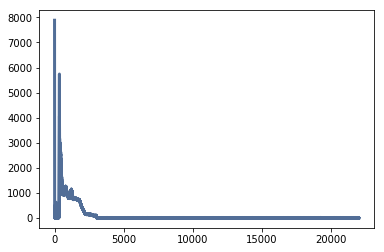

______________________________________
output : # 3


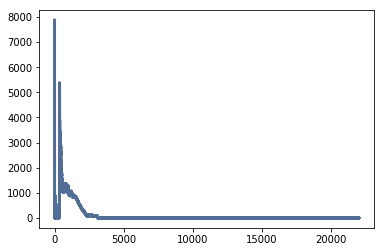

______________________________________
output : # 4


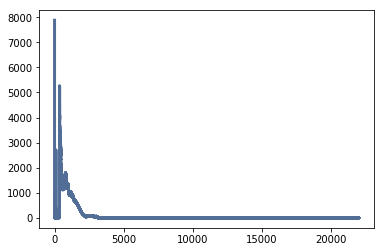

______________________________________
output : # 5


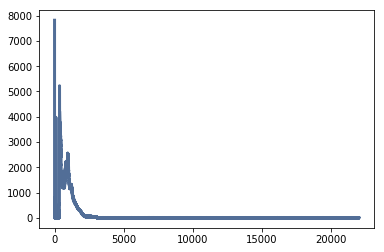

______________________________________


In [7]:
#Spectrum.plot_spectrum(raw_sound_out[0])
for i in range(len(raw_sound_out)):
    print("output : #" ,i)
    Spectrum.plot_spectrum(raw_sound_out[i])
    print("______________________________________")

In [8]:
data_in=Spectrum.make_amplitude_per_frequency_DataFrame(raw_sound_in)

In [9]:
data=[None]*6
for i in range(6):
    data[i]=Spectrum.make_amplitude_per_frequency_DataFrame(raw_sound_out[i])

In [10]:
tran=[None]*6
for i in range(6):
    tran[i]=Comparison.caculate_trasmission(data_in,data[i])
    tran[i]=tran[i][(tran[i].index<3000)&(tran[i].index>400)]

In [11]:
tran[0].head()

,Percent_out_per_in,Normalized_Percent,Normalized_Percent_loss
Frequency,,,
400.018459,0.578331,0.000843,0.999157
400.040168,0.569303,0.000830,0.999170
400.061876,0.563261,0.000821,0.999179
400.083584,0.556528,0.000811,0.999189
400.105293,0.549310,0.000801,0.999199


In [12]:
tran[0].tail()

,Percent_out_per_in,Normalized_Percent,Normalized_Percent_loss
Frequency,,,
2999.910509,0.207060,0.000301,0.999699
2999.932217,0.201602,0.000293,0.999707
2999.953925,0.201893,0.000293,0.999707
2999.975634,0.203928,0.000296,0.999704
2999.997342,0.204842,0.000297,0.999703


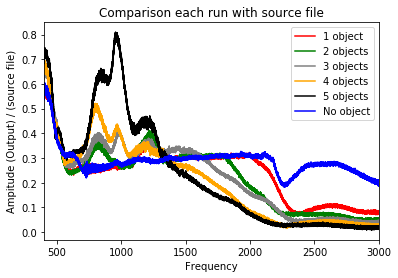

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
ax = plt.gca()
tran[1].plot(y='Percent_out_per_in', color='red',ax=ax, label='1 object')
tran[2].plot(y='Percent_out_per_in', color='green',ax=ax, label='2 objects')
tran[3].plot(y='Percent_out_per_in', color='gray',ax=ax, label='3 objects')
tran[4].plot(y='Percent_out_per_in', color='Orange',ax=ax, label='4 objects')
tran[5].plot(y='Percent_out_per_in', color='006400',ax=ax, label='5 objects')
tran[0].plot(y='Percent_out_per_in',color='Blue',ax=ax, label='No object')
plt.title('Comparison each run with source file')
plt.ylabel('Ampitude (Output) / (source file)')

plt.show()

In [14]:
for i in range(1,6):
    tran[i]=Comparison.caculate_trasmission(data[0],data[i])
    tran[i]=tran[i][(tran[i].index<3000)&(tran[i].index>400)]

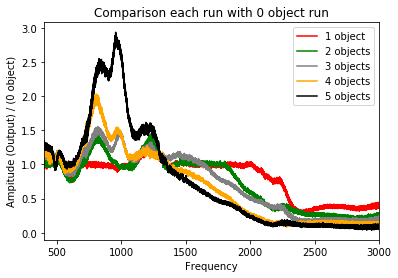

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
ax = plt.gca()
tran[1].plot(y='Percent_out_per_in', color='red',ax=ax,label='1 object')
tran[2].plot(y='Percent_out_per_in', color='green',ax=ax,label='2 objects')
tran[3].plot(y='Percent_out_per_in', color='gray',ax=ax,label='3 objects')
tran[4].plot(y='Percent_out_per_in', color='Orange',ax=ax,label='4 objects')
tran[5].plot(y='Percent_out_per_in', color='006400',ax=ax,label='5 objects')
plt.title('Comparison each run with 0 object run')
plt.ylabel('Ampitude (Output) / (0 object)')

plt.show()

In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [17]:
model=[LinearRegression() for i in range(120000)]

In [18]:
for i in range(1,5):
    ftran=tran[i]['Percent_out_per_in'].reset_index(drop = True)
    #print(ftran)
    print(len(ftran))
    for j in range(len(ftran)):
        if j%20000==0:
            print(i,j)
        #print(j,i,ftran[j])
        (model[j]).fit(np.array([[i]]),np.array([ftran[j]]))

119770
1 0
1 20000
1 40000
1 60000
1 80000
1 100000
119770
2 0
2 20000
2 40000
2 60000
2 80000
2 100000
119770
3 0
3 20000
3 40000
3 60000
3 80000
3 100000
119770
4 0
4 20000
4 40000
4 60000
4 80000
4 100000


In [19]:
from pandas import DataFrame
import numpy as np
import pandas as pd

tranpred=pd.DataFrame()
tranpred['Frequency']=tran[1].index
#tranpred['Percent_out_per_in']=np.array([None]*119770)
outpre=np.array([None]*119770)
for j in range(len(ftran)):
    outpre[j]=((model[j]).predict([[5]]))[0]
    #tranpred['Percent_out_per_in'][j]=model[j].predict([[5]])[0]
tranpred['Percent_out_per_in']=outpre
tranpred.set_index('Frequency',inplace=True)
tranpred.head()

,Percent_out_per_in
Frequency,
400.018459,1.16423
400.040168,1.17605
400.061876,1.18665
400.083584,1.18545
400.105293,1.18732


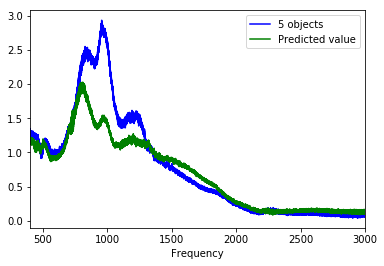

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
ax = plt.gca()
tran[5].plot(y='Percent_out_per_in', color='Blue',ax=ax,label='5 objects')
tranpred.plot(y='Percent_out_per_in', color='Green',ax=ax,label='Predicted value')
#plt.title('Comparison each run with 0 object run')
#plt.ylabel('Ampitude (Output) / (0 object)')

plt.show()

In [21]:
#model